<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L11_likelihood_ratio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asymptotic distribution of Likelihood Ratio Test statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

$X_1,\dots, X_n\sim$ i.i.d Bernoulli with probability $p$.

Test $H_0:\ p=p_{0}$ vs. $H_1:\ p\neq p_{0}$.  

The likelihood function is $L(p|x_{1},\dots,x_{n}) = \prod_{i=1}^{n} p^{x_{i}}(1-p)^{1-x_{i}} =  p^{\sum_{i} x_{i}}(1-p)^{n-\sum_{i} x_{i}}$. 

The Likelihood Ratio Test statistics is:
$$
\lambda(X_{1},\dots,X_{n}) = 
\frac{p_{0}^{\sum_{i=1}^{n} X_{i}} (1-p_{0})^{n-\sum_{i=1}^{n} X_{i}}}
{\bar{X}^{\sum_{i=1}^{n} X_{i}} (1-\bar{X})^{n-\sum_{i=1}^{n} X_{i}}}
$$
The sample mean is $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i}$.

In [2]:
#Data-generating process under the null hypothesis
p0 = 0.4 #null hypothesis
n = 1000 #sample size 
s = 10000 #number of simulations
x = np.random.binomial(1,p0,(n,s)) 

$$
\log \lambda(X_{1},\dots,X_{n}) = (\log p_{0})\sum_{i=1}^{n}X_{i} + \log (1-p_{0})(n-\sum_{i=1}^{n}X_{i}) - (\log \bar{X})\sum_{i=1}^{n}X_{i}  - \log (1-\bar{X})(n-\sum_{i=1}^{n}X_{i})
$$

In [3]:
#Log of likelihood ratio test statistic
sample_sum = np.sum(x,axis=0) #summing across observations within an experiment
sample_mean = np.mean(x,axis=0) #mean across observations within an experiment
lrt = np.log(p0)*sample_sum  + np.log(1-p0)*(n-sample_sum) - np.log(sample_mean)*sample_sum  - np.log(1-sample_mean)*(n-sample_sum)

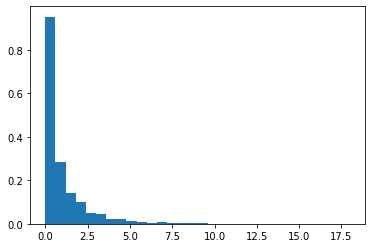

In [4]:
#Histogram of sampling distribution of -2*log of likelihood ratio test statistic
plt.hist(-2*lrt,bins = 30,density=True)
plt.show()

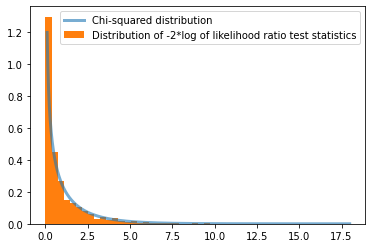

In [5]:
#Compare with chi-squared distribution. Does Wilks' Theorem hold here?
z = np.arange(0.1,max(-2*lrt),0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(z,chi2.pdf(z, df=1),lw=3, alpha=0.6, label='Chi-squared distribution')
ax.hist(-2*lrt,bins = 50,density=True,label='Distribution of -2*log of likelihood ratio test statistics')
ax.legend(loc='upper right')
plt.show()

# Power function

$\beta(p) = P(\lambda(\vec{X}) \leq c |p)$

For a size $\alpha = 0.05$ likelihood ratio test, the asymptotic critical value is 0.1465.

In [6]:
power = []
for p in np.linspace(0.1,0.9,100):
  x = np.random.binomial(1,p,(n,s)) 
  sample_sum = np.sum(x,axis=0) 
  sample_mean = np.mean(x,axis=0) 
  lrt = np.log(p0)*sample_sum  + np.log(1-p0)*(n-sample_sum) - np.log(sample_mean)*sample_sum  - np.log(1-sample_mean)*(n-sample_sum)
  #probability of rejecting the null at different values of p in the data-generating process
  power.append([np.mean(np.exp(lrt)<0.1465)])

(0.05, 1.0)

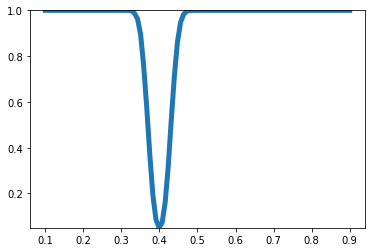

In [7]:
#Plotting the Power function
plt.plot(np.linspace(0.1,0.9,100),power,lw=5)
plt.ylim((0.05,1.0))